## Open the data file and have a look at the general information

In [1]:
# update seaborn library to use latest features
###########################################  WARNING!!!!! #####################################
####################### You may need to restart the kernel, otherwise in Section 3 seaborn will not plot histograms!!
try:
    !pip install seaborn --upgrade
except:
    print('Your seaborn was already updated! or Something else went wrong!')

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.2 MB/s eta 0:00:01


In [2]:
# necessary libraries
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load csv files with try-except
try:
    
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')
    print('All files were imported succesfully!')
except:
    print('Something went wrong! Please, check the file paths!')

All files were imported succesfully!


In [4]:
# a loop to retrieve first 3 rows and information about the columnsof each csv file 
for i in [calls, internet, messages, plans, users]:
    display(i.head(3))
    i.info()
    print()
    print('='*50)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



### Conclusion

Required libraries were imported and all CSV files containing data for analysis were loaded.
- The **calls**, **internet** and **messages** files contain the id of every call, internet session and message, respectively, which was made by a user. The **users** file contains information about each user and the plan they are using. The **plans** file contains information about what included in each plan and how much will be customers charged if they exceed the limit.

The issue have been observed so far is that date columns in all files are loaded as **object** type. We will need to convert them into **datetime** data type.

---

## Data preprocessing
In this step, necessary data type conversions, checking for missing and duplicate values will be performed.

### Convert the data to the necessary types
It was observed in the section 1, that all date containing columns have a data type of **object**. Let's convert them into **datetime** data type of python.

In [5]:
# convert all date columns from 'obj' to 'datetime'
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d', errors='coerce')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d', errors='coerce')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d', errors='coerce')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d', errors='coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='coerce')

#check calls data if it worked
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Find and eliminate errors in the data
Let's check if the data files contains missing or duplicated values. If they exist we will fix them.

In [6]:
# a loop to check missing and duplicated values in each data file
for i in [calls, internet, messages, plans, users]:
    display(i.isna().sum())
    print('Duplicated number of rows:', i.duplicated().sum())
    print('='*50)

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Duplicated number of rows: 0


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Duplicated number of rows: 0


id              0
user_id         0
message_date    0
dtype: int64

Duplicated number of rows: 0


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Duplicated number of rows: 0


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Duplicated number of rows: 0


> Perfect! Our data in perfect condition, no duplicates, no missing except the **churn_date** column of the **users** data. In the description of the task, it is already mentioned that if the **churn_date** is missing, then these users used the plan until the end. Therefore, we can fill missing values of **churn_date** with the last day of the data collection, which was done in 2018.

In [7]:
# fill the missing values with 2018-12-31 (the last day of data anlysis period)
users['churn_date']=users['churn_date'].fillna(pd.to_datetime('2018-12-31'))
users.churn_date.isna().sum() #check if it worked

0

> As we have seen from head rows of each data file, there were zero values in call duration and internet mb_used columns. Let's calculate how much % of rows have zero value.

In [8]:
print('Percentage of rows where call duration is equal to zero:',\
      round(len(calls[calls['duration']==0])/len(calls)*100, 2),'%')

print('Percentage of rows where mb_used is equal to zero:',\
      round(len(internet[internet['mb_used']==0])/len(calls)*100, 2),'%')

Percentage of rows where call duration is equal to zero: 19.48 %
Percentage of rows where mb_used is equal to zero: 9.98 %


> These are pretty much amount of data. These issues might be originating from the precision of "call duration counter" or "internet volume counter". For example, a user calls someone and hang up very quickly, i.e. just several milliseconds, and "call duration counter" counted it as zero.  For now, let's add 1 to all rows where duration or mb_used is equal to zero. This is reasonable because we know that Megaline rounds up seconds to minutes, regardless of how many seconds it is (even it is 0.1 seconds.).
The same goes for the internet volume counter. For example, the internet session might be only several kb, and it is less than 0.01 Mb and therefore it is registered as zero. Let's assign all rows with 0 Mb of data as 0.01 Mb of data because the mb_used column has 0.01 as the smallest value.

In [9]:
try:
    calls['duration'] = np.where(calls['duration'] == 0, 1, calls['duration'])
    internet['mb_used'] = np.where(internet['mb_used'] == 0, 0.01, internet['mb_used'])
    print('Mission was successfully completed!')
except:
    print('Check your code for typos or syntax error!')

Mission was successfully completed!


### The number of calls made and minutes used per month per user
In this step, we will find the total call minutes made by each user every month by adding individual call durations. However, we should remember that for calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute!

In [10]:
# round the seconds to minutes in call durations
calls['duration'] = calls['duration'].apply(np.ceil)
#check the result
calls.head(3)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0


In [11]:
# add individual call durations, to get a total monthly minues for each user
#reset index to get rid of multiindexing
monthly_calls = calls.groupby(
    ['user_id', calls['call_date'].dt.month])['duration'].agg(['count', 'sum'])\
    .reset_index()
#rename column names and check the results!
monthly_calls.rename(columns={'call_date':'month', 'count':'call_counts', 'sum':'total_mins'}, inplace=True)
monthly_calls.head(3)

,user_id,month,call_counts,total_mins
0,1000,12,16,124.0
1,1001,8,27,187.0
2,1001,9,49,326.0


### The number of text messages sent per month per user
In order to get monthly messages used by each user, count individual messages.

In [12]:
# count number of messages sent by each user every month
monthly_messages = messages.groupby(
    ['user_id', messages['message_date'].dt.month])['id'].agg('count')\
    .reset_index()

#rename columns and check the result
monthly_messages.rename(columns={'message_date':'month', 'id':'total_msg'}, inplace=True)
monthly_messages.head(3)

,user_id,month,total_msg
0,1000,12,11
1,1001,8,30
2,1001,9,44


### The volume of data per month per user

We will calculate the total volume of data that was used by each customer every month. 

In contrast to call durations, for web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

In [13]:
# total volume of internet traffic for each user for every month
monthly_internet = internet.groupby(
    ['user_id', internet['session_date'].dt.month])['mb_used'].agg('sum').reset_index()

#rename the columns and check the result
monthly_internet.rename(columns={'session_date':'month', 'mb_used':'total_mb'}, inplace=True)
monthly_internet.head(3)

,user_id,month,total_mb
0,1000,12,1901.48
1,1001,8,6919.19
2,1001,9,13314.95


In [14]:
#convert monthly mb to gb and round them up
monthly_internet['total_gb'] = (monthly_internet['total_mb']/1024).apply(np.ceil)

#drop mb_used column
monthly_internet.drop('total_mb', axis=1, inplace=True)
#check the reuslt

monthly_internet.head(4)

,user_id,month,total_gb
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0


### The monthly revenue from each user 
Now, we have separate data for monthly call durations, number of messages and volume of internet traffic that were used by each user. First thing first, it is time to merge all data into one (master dataframe). However, there might be a user, who does not use the internet but used only calls or messages. In such a case, we might get missing values in our master dataframe. No problem, we can fill these values with "0", which means no message, call or internet was used in that month by the user.

Then comes our main goal: monthly revenue from each user. For that we will subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan. It seems scary, is not it?! But not, if we build a function, which will do all the task for us in a matter of seconds.

At the end, we will give several plots for getting insight into revenue and customers.

In [15]:
# merge monthly_calls, monthly_messages and monthly_internet data into one using user_id and month
call_msg = monthly_calls.merge(monthly_messages, on=['user_id', 'month'], how='outer')
call_msg_int= call_msg.merge(monthly_internet, on=['user_id', 'month'], how='outer')

# merge above data with users file to know what plan every user is using
call_msg_int_user = call_msg_int.merge(users, on='user_id', how='left')

# drop unnecassary columns and check the result
call_msg_int_user.drop(columns=['first_name','last_name', 'age','reg_date','churn_date'], inplace=True)
call_msg_int_user.head(3)

,user_id,month,call_counts,total_mins,total_msg,total_gb,city,plan
0,1000,12,16.0,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,27.0,187.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,49.0,326.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [16]:
# check if we got missing values
call_msg_int_user.isna().sum()

user_id          0
month            0
call_counts     35
total_mins      35
total_msg      487
total_gb        16
city             0
plan             0
dtype: int64

In [17]:
# fill the missing value with 0
call_msg_int_user.fillna(0, inplace=True)

#check if it worked
call_msg_int_user.isna().sum().sum()

0

In [18]:
# print the plans dataframe
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [19]:
# build a function that check if a user exceeded monthly limit or not.
#if exceeded, then calcualte how much exceeded and how much extra fee he/she have to pay
# add monthly basic charge. The final results will be the monthly fee every user has paid.
def excess_fee(data):
    ex_min_fee=0
    ex_msg_fee=0
    ex_gb_fee=0
    
    #condition for surf plan
    if data['plan'] == 'surf':
        ex_min = 500 - data['total_mins']
        if ex_min < 0:
            ex_min_fee = (-1 * ex_min *0.03)  
        ex_msg = 50 - data['total_msg']
        if ex_msg < 0:
            ex_msg_fee = (-1 * ex_msg *0.03)  
        ex_gb = 15 - data['total_gb']
        if ex_gb < 0:
            ex_gb_fee = (-1 * ex_gb * 10)
        return (ex_min_fee + ex_msg_fee + ex_gb_fee + 20)
    
    #conditions for ultimate plan
    else:
        ex_min = 3000 - data['total_mins']
        if ex_min < 0:
            ex_min_fee = (-1 * ex_min *0.01)
        ex_msg = 1000 - data['total_msg']
        if ex_msg < 0:
            ex_msg_fee = (-1 * ex_msg *0.01)   
        ex_gb = 30 - data['total_gb']
        if ex_gb < 0:
            ex_gb_fee = (-1 * ex_gb * 7)
        return (ex_min_fee + ex_msg_fee + ex_gb_fee + 70)

In [20]:
#apply the above function to the master dataframe
call_msg_int_user['total_fee'] = call_msg_int_user.apply(excess_fee, axis=1)

#for convenience for later tasks, rename the dataframe and sort values according to the user, the month  
#and check the result
df = call_msg_int_user.sort_values(['user_id', 'month'])
df.head()

,user_id,month,call_counts,total_mins,total_msg,total_gb,city,plan,total_fee
0,1000,12,16.0,124.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,27.0,187.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,49.0,326.0,44.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,65.0,411.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,64.0,441.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00


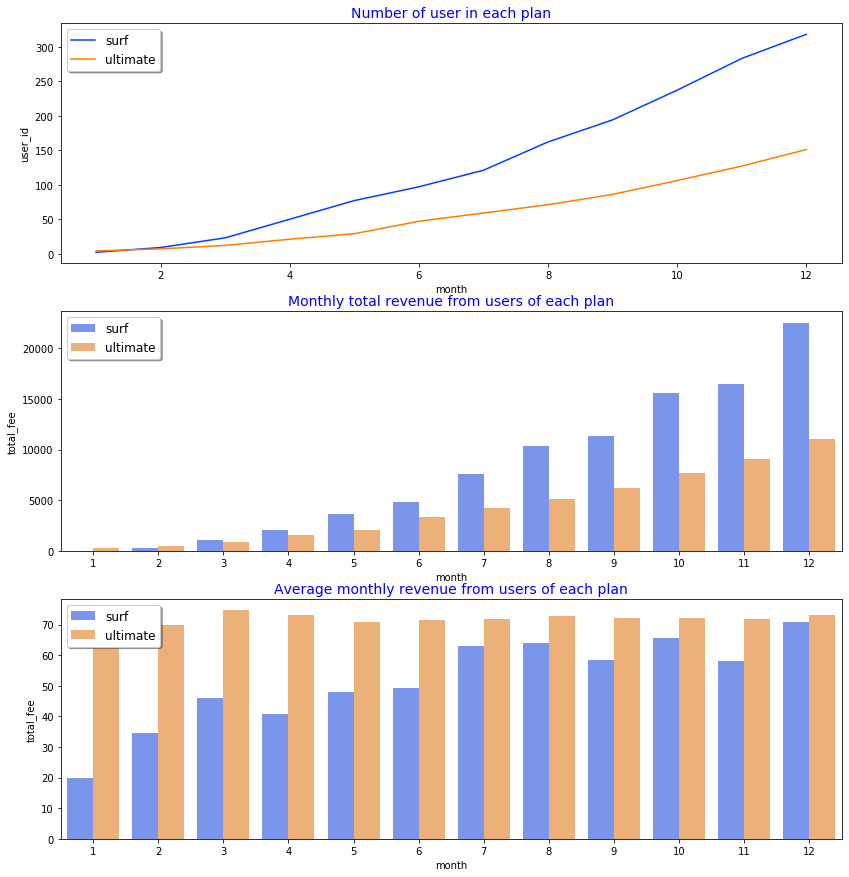

In [21]:
# several plots:
fig, ax= plt.subplots(3, figsize=(14,15))

#number of users who uses the plan every month
user_data=df.groupby(['month','plan'])['user_id'].count().reset_index()
sns.lineplot(data=user_data, x='month', y='user_id', hue='plan', palette='bright', ax=ax[0])
ax[0].legend(frameon=True, shadow=True, fontsize=12)
ax[0].set_title('Number of user in each plan', fontsize=14, color='blue')

#total revenue from users of a plan every month
sum_data=df.groupby(['month','plan'])['total_fee'].sum().reset_index()
sns.barplot(data=sum_data, x='month', y='total_fee', hue='plan', palette='bright', alpha=0.6, ax=ax[1])
ax[1].legend(frameon=True, shadow=True, fontsize=12)
ax[1].set_title('Monthly total revenue from users of each plan', fontsize=14, color='blue')

# average revenue from users of a plan every month 
mean_data=df.groupby(['month','plan'])['total_fee'].mean().reset_index()
sns.barplot(data=mean_data, x='month', y='total_fee', hue='plan', palette='bright' , alpha=0.6, ax=ax[2])
ax[2].legend(frameon=True, shadow=True, fontsize=12)
ax[2].set_title('Average monthly revenue from users of each plan', fontsize=14, color='blue')


plt.show()

### Conclusion

The data type of columns, which were containing date, were converted to **datetime** data type and the missing values in the **churn_date** column were filled with the last day of the data analysis (i.e. 2018-12-31). Additionally, around 20% of individual call durations and 10% of internet sessions (mb_used) hava a value of zero. These zero values were suspected arising due to precision of "call duration counter" or "internet volume counter". For example, when a user calls someone and hangs up very quickly, i.e. just several milliseconds, then the "call duration counter" counted it as zero. Similarly, for the "internet volume counter", for example, the internet session might be only several kb, and it is less than 0.01 Mb and therefore it is registered as zero. All zero values in **duration** column of the calls data and **mb_used** column of the internet data were changed with 1 min and 0.01 mb respectively. However, this isssue should be clraified with the responsible person and fixed (if possible) for future analysis!

Then individual call durations were rounded up and added to get the total minutes each user has used every month. The number of messages and internet volumes were also added to get the total monthly amounts per user. Subsequently, three different data were merged into one and the plan each user is using assigned using the **users** data. Unnecessary columns, such as the name, reg_date, churn_date columns were dropped.


A calculator was built: which checks whether a user has used extra minutes, text messages or internet volume out of their monthly limits. If they exceeded the monthly limit, the calculator adds an extra fee according to the **plans** file. Finally, it adds the monthly basic fee to get monthly total revenue from each user.


Several plots were made to get an insight into revenue from each plan and users. It was observed that the user number of both plans increased and in the last month, the number of customers who uses the 'surf' plan was two times more than the number of users who uses the 'ultimate' plan. Even though, 'surf' users pay three times less basic fee per month, the monthly total revenue from the 'surf' plan was almost two times more than 'ultimate'. This is not only due to the number of users, but also those who use the 'surf' plan more often by going over their monthly limit and paying extra money. This can be clear from the monthly average revenue per user plot. For example, in the last month, the average revenue from 'surf' plan users was almost equal to 'ultimate' plan users. However, the 'surf' plan costs only 20 USD while the 'ultimate' plan costs 70 USD monthly without extra fees.

---

## Data analysis
In this section we will describe the customers' behavior. For this, first, we will find the minutes, texts, and volume of data the users of each plan require per month. We will calculate the mean, variance, and standard deviation, sunsequently plot histograms and describe the distributions.

In [22]:
# overall statistics of data
df.describe()

,user_id,month,call_counts,total_mins,total_msg,total_gb,total_fee
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,60.067597,440.986044,33.166594,16.870475,64.483301
std,143.051927,2.496386,32.402563,242.285165,34.070085,7.796174,46.670078
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,38.000000,273.000000,3.000000,12.000000,23.930000
50%,1245.000000,10.000000,60.000000,438.000000,26.000000,17.000000,70.000000
75%,1368.000000,11.000000,79.000000,588.000000,51.000000,21.000000,70.000000
max,1499.000000,12.000000,205.000000,1548.000000,266.000000,70.000000,591.270000


In [23]:
# calculate average minutes, number of messages and internet volume each user require (calculate std, var as well)
customer_behavior=df.groupby(['plan', 'user_id','city'])\
                            ['total_mins','total_msg','total_gb', 'total_fee']\
                            .agg([np.mean, np.var, np.std]).reset_index()   #reset index to get rid of multiindeces

#rename columns
customer_behavior.columns=['plan', 'user_id','city','avg_min','var_min', 'std_min', 'avg_msg', 'var_msg','std_msg', 
                    'avg_gb', 'var_gb', 'std_gb', 'avg_fee', 'var_fee', 'std_fee']

#when there is only one value, then np.var and np.std return NaN (value/(n-1 which is zero)). Therefore fil them with 0
customer_behavior.fillna(0, inplace=True)

#check random 5 rows
customer_behavior.sample(5)

,plan,user_id,city,avg_min,var_min,std_min,avg_msg,var_msg,std_msg,avg_gb,var_gb,std_gb,avg_fee,var_fee,std_fee
350,ultimate,1047,"Indianapolis-Carmel-Anderson, IN MSA",378.0,0.000000,0.000000,7.000000,0.000000,0.000000,17.000000,0.000000,0.000000,70.00,0.0,0.0
281,surf,1413,"Bakersfield, CA MSA",343.0,0.000000,0.000000,30.000000,0.000000,0.000000,15.000000,0.000000,0.000000,20.00,0.0,0.0
474,ultimate,1456,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",470.0,11865.666667,108.929641,33.428571,44.619048,6.679749,12.000000,3.666667,1.914854,70.00,0.0,0.0
341,ultimate,1031,"New York-Newark-Jersey City, NY-NJ-PA MSA",504.5,11580.700000,107.613661,2.333333,2.266667,1.505545,15.666667,17.466667,4.179314,70.00,0.0,0.0
249,surf,1360,"Charlotte-Concord-Gastonia, NC-SC MSA",838.0,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,120.14,0.0,0.0


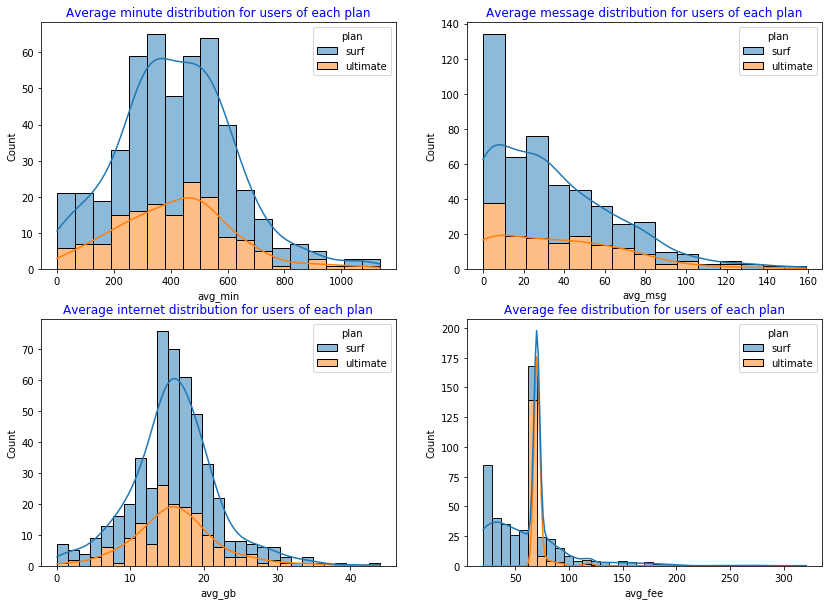

In [24]:
# histograms to show distribution of average minutes, messages, internet and fee for users of each plan
fig, ax= plt.subplots(2,2,figsize=(14,10))

sns.histplot(data=customer_behavior, x='avg_min', hue='plan', alpha=0.5, multiple='stack', kde=True, ax=ax[0, 0])
ax[0,0].set_title('Average minute distribution for users of each plan', fontsize=12, color='blue')

sns.histplot(data=customer_behavior, x='avg_msg', hue='plan', alpha=0.5, multiple='stack', kde=True, ax=ax[0, 1])
ax[0,1].set_title('Average message distribution for users of each plan', fontsize=12, color='blue')

sns.histplot(data=customer_behavior, x='avg_gb', hue='plan', alpha=0.5, multiple='stack', kde=True, ax=ax[1,0])
ax[1,0].set_title('Average internet distribution for users of each plan', fontsize=12, color='blue')

sns.histplot(data=customer_behavior, x='avg_fee', hue='plan', alpha=0.5, multiple='stack', kde=True, ax=ax[1,1])
ax[1,1].set_title('Average fee distribution for users of each plan', fontsize=12, color='blue')

plt.show()

### Conclusion

Then average minutes, messages, internet and fee for users of each plan obtained as a pivot table. Histograms were built based on these pivot table. Accordingly:
- Average minutes histogram for both plans has a more or less normal distribution. The major amount of users for both plans require minutes up to 70 minutes.
- Average text messages histogram for both plans have skewed to the right, showing that most of the users do not require text message at all. This might be due to internet-based messaging apps.
- Average internet volume histogram for both plans have a normal distribution with the majority of users need around 10k to 20k megabytes of internet monthly.

---

## Testing the hypotheses
Now it is time to see either the 'surf' plan or 'ultimate' plan brings in more revenue to Megaline. As well as, it is interesting to see if NY-NJ regions are more profitable than other regions.

### The average revenue from users of Ultimate and Surf calling plans differs
This task is straightforward, we will take 'total_fee' columns for each plan as a series. Then use statistical methods to compare the means of two plans using **scipy.stats.ttest_ind()** function. Here is our hypothesis:
- Null hypothesis: revenue from each plan are similar (both plans brings more or less equal revenue)
- Alternative hypothesis: revenue from each plan are differs (one plan brings more revenue than another).

In [25]:
# get sample of 100 user for each plan
revenue_surf = customer_behavior[customer_behavior['plan']=='surf']['avg_fee']
revenue_ultimate = customer_behavior[customer_behavior['plan']=='ultimate']['avg_fee']

alpha=0.05 #confidence level 95%

#test difference of mean of each plan
results = st.ttest_ind(revenue_surf, revenue_ultimate)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis (revenues from each plan are different)!")
else:
    print("We can't reject the null hypothesis (revenues from each plan are not significantly different)!")

p-value: 0.00014197836417141033
We reject the null hypothesis (revenues from each plan are different)!


In [26]:
# print revenue of both plans
print('Average revenue coming from the "surf" plan is:', round(np.mean(revenue_surf)), 'USD')
print('Average revenue coming from the "ultimate" plan is:', round(np.mean(revenue_ultimate)), 'USD')

Average revenue coming from the "surf" plan is: 58 USD
Average revenue coming from the "ultimate" plan is: 72 USD


### The average revenue from users in NY-NJ area is different from that of the users from other regions
For this task, we need to find users who live in the NY-NJ regions. It is not directly indicated in the data, but we have a **city** column, which mentioned the city and region together. We will pull out the region from there. The rule to assign NY-NJ region is as follows: If NY and/or NJ exist in the **city**, then we will categorize this row as "NY-NJ", otherwise we will categorize it as "other".

In [27]:
# a function to categorize the data as NY-NJ, otherwise will return NaN
def regionizer(city):
    target=['NY', 'NJ']
    region = city.split(',')[1].split()[0].split('-')
    for i in region:
        if i in target:
            return 'NY-NJ'
#test the function
print(regionizer(df['city'][357]))

NY-NJ


In [28]:
#apply the function
customer_behavior['region'] = customer_behavior['city'].apply(regionizer)

#fill NaN values with "other"
customer_behavior.region.fillna('other', inplace=True)

#number of users for each category
display(customer_behavior['region'].value_counts())

#check the head of the new data
customer_behavior.head(3)

other    388
NY-NJ    102
Name: region, dtype: int64

,plan,user_id,city,avg_min,var_min,std_min,avg_msg,var_msg,std_msg,avg_gb,var_gb,std_gb,avg_fee,var_fee,std_fee,region
0,surf,1001,"Seattle-Tacoma-Bellevue, WA MSA",357.400000,11014.300000,104.949035,41.400000,76.800000,8.763561,16.200000,34.700000,5.890671,50.018000,901.801620,30.030012,other
1,surf,1002,"Las Vegas-Henderson-Paradise, NV MSA",282.666667,36520.333333,191.102939,29.333333,174.333333,13.203535,13.666667,37.333333,6.110101,33.333333,533.333333,23.094011,other
2,surf,1003,"Tulsa, OK MSA",1135.000000,0.000000,0.000000,50.000000,0.000000,0.000000,27.000000,0.000000,0.000000,159.050000,0.000000,0.000000,other


In [29]:
# take randomly 80 samples for each catogery with avg_fee they pay for megaline
revenue_NY_NJ = customer_behavior[customer_behavior['region']=='NY-NJ']['avg_fee']
revenue_other = customer_behavior[customer_behavior['region']=='other']['avg_fee']

alpha=0.05 #confidence level 95%

#test their equality
results = st.ttest_ind(revenue_NY_NJ, revenue_other)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis. \
That means, revenues from NY-NJ and other regions are significantly different!")
else:
    print("We can't reject the null hypothesis.\nThat means, revenues from NY-NJ and other regions are not significantly different!")

p-value: 0.4738297735861585
We can't reject the null hypothesis.
That means, revenues from NY-NJ and other regions are not significantly different!


In [30]:
# print revenue of both test regions
print('Average revenue coming from user who lives in NY-NJ regions is equal to:', round(np.mean(revenue_NY_NJ)),'USD')
print('Average revenue coming from user who lives in other regions is equal to:', round(np.mean(revenue_other)),'USD')

Average revenue coming from user who lives in NY-NJ regions is equal to: 60 USD
Average revenue coming from user who lives in other regions is equal to: 63 USD


### Conclusion

> Customer_behavior data was used to test the hypothesis. With 95% confidence, it was observed that revenue coming from each plan is not equal. More precisely, on average surf plan, users pay 58 USD per month, while 'ultimate' plan users pay 72 USD per month. However, the number of ultimate plan users are almost two times less than surf plan users. Therefore, we should invest more into an advertisement of the ultimate plan and attract more customers for our more profitable plan.
On another hand, the revenue coming from users in NY-NJ was not significantly different from other regions. For now, it is not important to focus on customers from NY-NJ, specifically.

---

## Overall Conculsion

- The **calls**, **internet** and **messages** files containing the id of every call, internet session and message, respectively, were imported. Additionally, the **users** file containing information about each user and the plan they are using, as well as the **plans** file containing information about what included in each plan and how much will be customers charged if they exceed the limit were imported.

- There was an issue with the data type of date columns in all files. We have converted them from **object** type to **datetime** data type. The missing values in the **churn_date** column were filled with the last day of the data analysis (i.e. 2018-12-31).  Additionally, around 20% of individual call durations and 10% of internet sessions (mb_used) hava a value of 0 (zero). These zero values were suspected arising due to precision of "call duration counter" or "internet volume counter". For example, when a user calls someone and hangs up very quickly, i.e. just several milliseconds, then the "call duration counter" counted it as zero. Similarly, for the "internet volume counter", for example, the internet session might be only several kb, and it is less than 0.01 Mb and therefore it is registered as zero. All zero values in **duration** column of the calls data and **mb_used** column of the internet data were changed with 1 min and 0.01 mb respectively. However, this isssue should be clarified with the responsible person and fixed (if possible) for future analysis!

- Then individual call durations were rounded up and added to get the total minutes each user has used every month. The number of messages and internet volumes were also added to get the total monthly amounts per user. Subsequently, three different data were merged into one and the plan each user used were assigned with the help of the **users** file. Unnecessary columns, such as the name, reg_date, churn_date columns were dropped. A new column ```total_fee``` was added to data by calculating how much every month each user paid, according to **plans** files.

- Several plots were made to get an insight into revenue from each plan and users. It was observed that the user number of both plans increased and in the last month, the number of customers who uses the 'surf' plan was two times more than the number of users who uses the 'ultimate' plan. Even though, 'surf' users pay three times less basic fee per month, the monthly total revenue from the 'surf' plan was almost two times more than 'ultimate'. This is not only due to the number of users, but also those who use the 'surf' plan more often by going over their monthly limit and paying extra money. This can be clear from the monthly average revenue per user plot. For example, in the last month, the average revenue from 'surf' plan users was almost equal to 'ultimate' plan users. However, the 'surf' plan costs only 20 USD while the 'ultimate' plan costs 70 USD monthly without extra fees.

- In order to analyze customer behavior, average minutes, messages, internet and fee for users of each plan obtained as a pivot table. Histograms were built based on these pivot table. Accordingly average minutes histogram for both plans has a more or less normal distribution. The major amount of users for both plans require minutes up to 70 minutes. Average text messages histogram for both plans have skewed to the right, showing that most of the users do not require text message at all. This might be due to internet-based messaging apps. Average internet volume histogram for both plans have a normal distribution with the majority of users need around 10k to 20k megabytes of internet monthly.

- Customer_behavior data, which contains average minutes, fee each user paid during analysis period, was used to test the hypothesis. With 95% confidence, it was observed that revenue coming from each plan is not equal. More precisely, on average ```surf``` plan, users pay **58 USD** per month, while ```ultimate``` plan users pay **72 USD** per month. However, the number of ultimate plan users are almost two times less than surf plan users. Therefore, we should invest more into an advertisement of the ultimate plan and attract more customers for our more profitable plan.On another hand, the revenue coming from users in ```NY-NJ``` was not significantly different from ```other``` regions. For now, it is not important to focus on customers from NY-NJ, specifically.